In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('fifa21_train.csv')
data.head()
# Use validation data to test the model

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [2]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,11701.0,NaN,NaN,NaN,219436.649004,37480.006004,27.0,204060.0,229040.0,244176.0,259090.0
Name,11701,11232,J. Rojas,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,11701.0,NaN,NaN,NaN,25.27049,4.95764,16.0,21.0,25.0,29.0,43.0
Nationality,11701,159,England,1162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club,11683,885,OGC Nice,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
CB,11701,313,63+2,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RCB,11701,313,63+2,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RB,11701,262,62+2,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GK,11701,155,16+2,2157,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns.values

array(['ID', 'Name', 'Age', 'Nationality', 'Club', 'BP', 'Position',
       'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined',
       'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W',
       'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits',
       'LS', 'ST', 'RS', 'LW', 'LF', 

In [4]:
data2 = data[['BP','Age','Height','Weight','foot','Growth','Value','Attacking','Skill','Movement','Power','Mentality','Defending',
              'Goalkeeping','Total Stats','Base Stats', 'W/F', 'SM', 'A/W','D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
              'PHY','OVA']].copy()
data2

,BP,Age,Height,Weight,foot,Growth,Value,Attacking,Skill,Movement,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,CM,26,"5'9""",161lbs,Right,1,€525K,258,286,346,...,High,Medium,1 ★,69,51,63,63,51,60,64
1,ST,30,"6'0""",159lbs,Right,0,€8.5M,365,375,404,...,High,Low,2 ★,83,75,68,82,33,71,77
2,CAM,33,"5'4""",134lbs,Right,0,€9M,336,424,424,...,High,Medium,2 ★,80,77,78,86,27,56,80
3,CDM,22,"5'10""",152lbs,Right,13,€275K,242,259,282,...,Medium,Medium,1 ★,57,44,54,57,57,60,59
4,CDM,23,"5'11""",150lbs,Right,8,€725K,249,280,324,...,Low,Medium,1 ★,66,44,60,64,60,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,LB,25,"6'1""",168lbs,Left,5,€625K,224,248,333,...,Medium,Medium,1 ★,75,28,56,59,60,69,65
11697,GK,27,"6'1""",174lbs,Right,4,€1.6M,84,96,237,...,Medium,Medium,1 ★,72,67,66,72,40,70,70
11698,RM,22,"5'6""",143lbs,Right,8,€1.1M,286,291,388,...,High,Medium,1 ★,76,60,60,72,26,43,67
11699,CM,26,"6'2""",179lbs,Right,7,€0,254,284,198,...,NaN,NaN,3 ★,72,63,70,72,57,66,68


In [5]:
data2.columns.values

array(['BP', 'Age', 'Height', 'Weight', 'foot', 'Growth', 'Value',
       'Attacking', 'Skill', 'Movement', 'Power', 'Mentality',
       'Defending', 'Goalkeeping', 'Total Stats', 'Base Stats', 'W/F',
       'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
       'OVA'], dtype=object)

In [6]:
data2.dtypes

BP             object
Age             int64
Height         object
Weight         object
foot           object
Growth          int64
Value          object
Attacking       int64
Skill           int64
Movement        int64
Power           int64
Mentality       int64
Defending       int64
Goalkeeping     int64
Total Stats     int64
Base Stats      int64
W/F            object
SM             object
A/W            object
D/W            object
IR             object
PAC             int64
SHO             int64
PAS             int64
DRI             int64
DEF             int64
PHY             int64
OVA             int64
dtype: object

In [7]:
def feet_to_cm(height_str):
    feet, inches = map(int, height_str.replace('"', '').split("'"))
    total_inches = (feet * 12) + inches
    cm = total_inches * 2.54
    return cm
data2['Height'] = data2['Height'].apply(feet_to_cm)

In [8]:
data2

,BP,Age,Height,Weight,foot,Growth,Value,Attacking,Skill,Movement,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,CM,26,175.26,161lbs,Right,1,€525K,258,286,346,...,High,Medium,1 ★,69,51,63,63,51,60,64
1,ST,30,182.88,159lbs,Right,0,€8.5M,365,375,404,...,High,Low,2 ★,83,75,68,82,33,71,77
2,CAM,33,162.56,134lbs,Right,0,€9M,336,424,424,...,High,Medium,2 ★,80,77,78,86,27,56,80
3,CDM,22,177.80,152lbs,Right,13,€275K,242,259,282,...,Medium,Medium,1 ★,57,44,54,57,57,60,59
4,CDM,23,180.34,150lbs,Right,8,€725K,249,280,324,...,Low,Medium,1 ★,66,44,60,64,60,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,LB,25,185.42,168lbs,Left,5,€625K,224,248,333,...,Medium,Medium,1 ★,75,28,56,59,60,69,65
11697,GK,27,185.42,174lbs,Right,4,€1.6M,84,96,237,...,Medium,Medium,1 ★,72,67,66,72,40,70,70
11698,RM,22,167.64,143lbs,Right,8,€1.1M,286,291,388,...,High,Medium,1 ★,76,60,60,72,26,43,67
11699,CM,26,187.96,179lbs,Right,7,€0,254,284,198,...,NaN,NaN,3 ★,72,63,70,72,57,66,68


In [9]:
data2.dtypes

BP              object
Age              int64
Height         float64
Weight          object
foot            object
Growth           int64
Value           object
Attacking        int64
Skill            int64
Movement         int64
Power            int64
Mentality        int64
Defending        int64
Goalkeeping      int64
Total Stats      int64
Base Stats       int64
W/F             object
SM              object
A/W             object
D/W             object
IR              object
PAC              int64
SHO              int64
PAS              int64
DRI              int64
DEF              int64
PHY              int64
OVA              int64
dtype: object

In [10]:
data2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BP,11701,15,CB,2170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,11701.0,NaN,NaN,NaN,25.27049,4.95764,16.0,21.0,25.0,29.0,43.0
Height,11701.0,NaN,NaN,NaN,181.225234,6.913566,154.94,175.26,180.34,185.42,205.74
Weight,11701,55,154lbs,931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
foot,11701,2,Right,8828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Growth,11701.0,NaN,NaN,NaN,5.534655,5.810903,-1.0,0.0,4.0,10.0,26.0
Value,11701,203,€1.1M,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attacking,11701.0,NaN,NaN,NaN,258.482181,72.267012,33.0,232.0,271.0,306.0,437.0
Skill,11701.0,NaN,NaN,NaN,266.497222,76.835287,43.0,232.0,279.0,319.0,470.0
Movement,11701.0,NaN,NaN,NaN,322.617383,55.330054,113.0,294.0,331.0,361.0,464.0


In [11]:
data2['Weight']=data2['Weight'].str.replace("lbs","")
data2['Weight']=pd.to_numeric(data2['Weight'], errors='coerce')
data2

,BP,Age,Height,Weight,foot,Growth,Value,Attacking,Skill,Movement,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,CM,26,175.26,161,Right,1,€525K,258,286,346,...,High,Medium,1 ★,69,51,63,63,51,60,64
1,ST,30,182.88,159,Right,0,€8.5M,365,375,404,...,High,Low,2 ★,83,75,68,82,33,71,77
2,CAM,33,162.56,134,Right,0,€9M,336,424,424,...,High,Medium,2 ★,80,77,78,86,27,56,80
3,CDM,22,177.80,152,Right,13,€275K,242,259,282,...,Medium,Medium,1 ★,57,44,54,57,57,60,59
4,CDM,23,180.34,150,Right,8,€725K,249,280,324,...,Low,Medium,1 ★,66,44,60,64,60,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,LB,25,185.42,168,Left,5,€625K,224,248,333,...,Medium,Medium,1 ★,75,28,56,59,60,69,65
11697,GK,27,185.42,174,Right,4,€1.6M,84,96,237,...,Medium,Medium,1 ★,72,67,66,72,40,70,70
11698,RM,22,167.64,143,Right,8,€1.1M,286,291,388,...,High,Medium,1 ★,76,60,60,72,26,43,67
11699,CM,26,187.96,179,Right,7,€0,254,284,198,...,NaN,NaN,3 ★,72,63,70,72,57,66,68


In [12]:
data2.dtypes

BP              object
Age              int64
Height         float64
Weight           int64
foot            object
Growth           int64
Value           object
Attacking        int64
Skill            int64
Movement         int64
Power            int64
Mentality        int64
Defending        int64
Goalkeeping      int64
Total Stats      int64
Base Stats       int64
W/F             object
SM              object
A/W             object
D/W             object
IR              object
PAC              int64
SHO              int64
PAS              int64
DRI              int64
DEF              int64
PHY              int64
OVA              int64
dtype: object

In [13]:
def value_calc(value_str):
    value = value_str.replace("€","")
    if 'M' in value:
        value = value.replace("M","")
        value = pd.to_numeric(value, errors='coerce')
        value = value * 1000000
    elif 'K' in value:
        value = value.replace("K","")
        value = pd.to_numeric(value, errors='coerce')
        value = value * 1000
    else:
        value = pd.to_numeric(value, errors='coerce')
    return value

data2['Value'] = data2['Value'].apply(value_calc)
data2

,BP,Age,Height,Weight,foot,Growth,Value,Attacking,Skill,Movement,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,CM,26,175.26,161,Right,1,525000.0,258,286,346,...,High,Medium,1 ★,69,51,63,63,51,60,64
1,ST,30,182.88,159,Right,0,8500000.0,365,375,404,...,High,Low,2 ★,83,75,68,82,33,71,77
2,CAM,33,162.56,134,Right,0,9000000.0,336,424,424,...,High,Medium,2 ★,80,77,78,86,27,56,80
3,CDM,22,177.80,152,Right,13,275000.0,242,259,282,...,Medium,Medium,1 ★,57,44,54,57,57,60,59
4,CDM,23,180.34,150,Right,8,725000.0,249,280,324,...,Low,Medium,1 ★,66,44,60,64,60,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,LB,25,185.42,168,Left,5,625000.0,224,248,333,...,Medium,Medium,1 ★,75,28,56,59,60,69,65
11697,GK,27,185.42,174,Right,4,1600000.0,84,96,237,...,Medium,Medium,1 ★,72,67,66,72,40,70,70
11698,RM,22,167.64,143,Right,8,1100000.0,286,291,388,...,High,Medium,1 ★,76,60,60,72,26,43,67
11699,CM,26,187.96,179,Right,7,0.0,254,284,198,...,NaN,NaN,3 ★,72,63,70,72,57,66,68


In [14]:
data2['W/F'] = data2['W/F'].str.replace(" ★","")
data2['W/F']=pd.to_numeric(data2['W/F'], errors='coerce')
data2['W/F']

0        4
1        3
2        4
3        2
4        2
        ..
11696    3
11697    2
11698    3
11699    3
11700    3
Name: W/F, Length: 11701, dtype: int64

In [15]:
data2['SM'] = data2['SM'].str.replace("★","")
data2['SM']=pd.to_numeric(data2['SM'], errors='coerce')
data2['IR'] = data2['IR'].str.replace(" ★","")
data2['IR']=pd.to_numeric(data2['IR'], errors='coerce')
data2

,BP,Age,Height,Weight,foot,Growth,Value,Attacking,Skill,Movement,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,CM,26,175.26,161,Right,1,525000.0,258,286,346,...,High,Medium,1,69,51,63,63,51,60,64
1,ST,30,182.88,159,Right,0,8500000.0,365,375,404,...,High,Low,2,83,75,68,82,33,71,77
2,CAM,33,162.56,134,Right,0,9000000.0,336,424,424,...,High,Medium,2,80,77,78,86,27,56,80
3,CDM,22,177.80,152,Right,13,275000.0,242,259,282,...,Medium,Medium,1,57,44,54,57,57,60,59
4,CDM,23,180.34,150,Right,8,725000.0,249,280,324,...,Low,Medium,1,66,44,60,64,60,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,LB,25,185.42,168,Left,5,625000.0,224,248,333,...,Medium,Medium,1,75,28,56,59,60,69,65
11697,GK,27,185.42,174,Right,4,1600000.0,84,96,237,...,Medium,Medium,1,72,67,66,72,40,70,70
11698,RM,22,167.64,143,Right,8,1100000.0,286,291,388,...,High,Medium,1,76,60,60,72,26,43,67
11699,CM,26,187.96,179,Right,7,0.0,254,284,198,...,NaN,NaN,3,72,63,70,72,57,66,68


In [16]:
#replace nans with the modal value

data2['A/W'] = data2['A/W'].fillna('Medium')
data2['D/W'] = data2['D/W'].fillna('Medium')
data2

,BP,Age,Height,Weight,foot,Growth,Value,Attacking,Skill,Movement,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,CM,26,175.26,161,Right,1,525000.0,258,286,346,...,High,Medium,1,69,51,63,63,51,60,64
1,ST,30,182.88,159,Right,0,8500000.0,365,375,404,...,High,Low,2,83,75,68,82,33,71,77
2,CAM,33,162.56,134,Right,0,9000000.0,336,424,424,...,High,Medium,2,80,77,78,86,27,56,80
3,CDM,22,177.80,152,Right,13,275000.0,242,259,282,...,Medium,Medium,1,57,44,54,57,57,60,59
4,CDM,23,180.34,150,Right,8,725000.0,249,280,324,...,Low,Medium,1,66,44,60,64,60,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,LB,25,185.42,168,Left,5,625000.0,224,248,333,...,Medium,Medium,1,75,28,56,59,60,69,65
11697,GK,27,185.42,174,Right,4,1600000.0,84,96,237,...,Medium,Medium,1,72,67,66,72,40,70,70
11698,RM,22,167.64,143,Right,8,1100000.0,286,291,388,...,High,Medium,1,76,60,60,72,26,43,67
11699,CM,26,187.96,179,Right,7,0.0,254,284,198,...,Medium,Medium,3,72,63,70,72,57,66,68


In [17]:
categorical = data2.select_dtypes('object')
numerical = data2._get_numeric_data().drop(['OVA'], axis=1)
categorical

,BP,foot,A/W,D/W
0,CM,Right,High,Medium
1,ST,Right,High,Low
2,CAM,Right,High,Medium
3,CDM,Right,Medium,Medium
4,CDM,Right,Low,Medium
...,...,...,...,...
11696,LB,Left,Medium,Medium
11697,GK,Right,Medium,Medium
11698,RM,Right,High,Medium
11699,CM,Right,Medium,Medium


In [18]:
categorical['A/W'].value_counts(dropna=False)

Medium    7553
High      3548
Low        600
Name: A/W, dtype: int64

,Age,Height,Weight,Growth,Value,Attacking,Skill,Movement,Power,Mentality,...,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY
Age,1.000000,0.095369,0.257338,-0.854136,0.096757,0.191137,0.175981,-0.051802,0.314169,0.278804,...,0.417633,0.088939,0.072587,0.402010,-0.176232,0.311175,0.402361,0.242675,0.225285,0.434448
Height,0.095369,1.000000,0.768096,-0.053797,-0.002372,-0.350153,-0.454377,-0.634614,-0.129197,-0.301619,...,-0.118051,-0.161631,-0.423024,0.054875,-0.380658,-0.087724,-0.204511,-0.310837,0.090802,0.444814
Weight,0.257338,0.768096,1.000000,-0.219624,0.035361,-0.250868,-0.352398,-0.536489,0.007573,-0.197294,...,0.005588,-0.119104,-0.348603,0.119917,-0.341935,0.013883,-0.100392,-0.210029,0.101667,0.538053
Growth,-0.854136,-0.053797,-0.219624,1.000000,-0.186735,-0.281668,-0.262893,-0.101370,-0.427800,-0.348028,...,-0.516137,-0.104888,-0.165475,-0.269322,0.019677,-0.334891,-0.439781,-0.320569,-0.240244,-0.484123
Value,0.096757,-0.002372,0.035361,-0.186735,1.000000,0.286165,0.297288,0.262040,0.326979,0.303380,...,0.526670,0.151226,0.276583,0.457919,0.215480,0.325187,0.444784,0.442928,0.168934,0.265114
Attacking,0.191137,-0.350153,-0.250868,-0.281668,0.286165,1.000000,0.928584,0.692493,0.823527,0.888604,...,0.425923,0.356096,0.765994,0.232224,0.181119,0.349931,0.370180,0.379978,0.103203,0.107896
Skill,0.175981,-0.454377,-0.352398,-0.262893,0.297288,0.928584,1.000000,0.725776,0.753061,0.885893,...,0.499657,0.354396,0.789008,0.225664,0.217046,0.325009,0.514101,0.486271,0.171817,0.031079
Movement,-0.051802,-0.634614,-0.536489,-0.101370,0.262040,0.692493,0.725776,1.000000,0.560489,0.610661,...,0.450295,0.279000,0.700280,0.032241,0.705488,0.227513,0.307423,0.497619,0.008547,-0.111590
Power,0.314169,-0.129197,0.007573,-0.427800,0.326979,0.823527,0.753061,0.560489,1.000000,0.823428,...,0.573182,0.289072,0.583623,0.208833,0.157692,0.374796,0.355994,0.332691,0.248330,0.519953
Mentality,0.278804,-0.301619,-0.197294,-0.348028,0.303380,0.888604,0.885893,0.610661,0.823428,1.000000,...,0.515576,0.295172,0.661055,0.260338,0.065620,0.186766,0.408774,0.308240,0.429305,0.312193


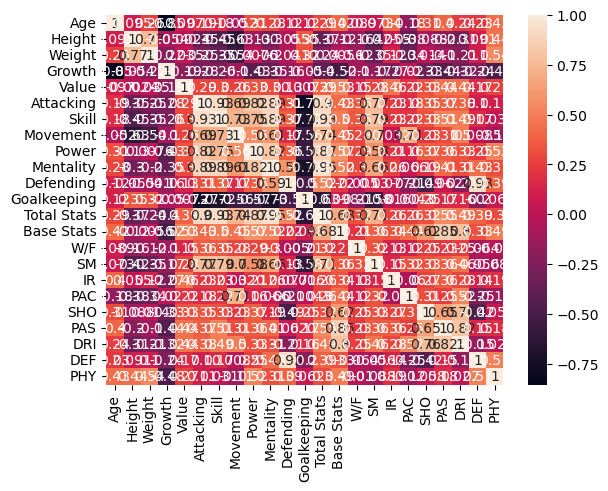

In [51]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)

plt.show
correlations_matrix

In [19]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numerical)
numerical_scaled = transformer.transform(numerical)
numerical_scaled = pd.DataFrame(numerical_scaled, columns=numerical.columns)
numerical_scaled

,Age,Height,Weight,Growth,Value,Attacking,Skill,Movement,Power,Mentality,...,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,0.370370,0.40,0.349206,0.074074,0.005833,0.556931,0.569087,0.663818,0.556270,0.654596,...,0.492366,0.75,0.25,0.00,0.614286,0.447368,0.558824,0.522388,0.506494,0.500000
1,0.518519,0.55,0.333333,0.037037,0.094444,0.821782,0.777518,0.829060,0.768489,0.718663,...,0.702290,0.50,0.75,0.25,0.814286,0.763158,0.632353,0.805970,0.272727,0.666667
2,0.629630,0.15,0.134921,0.037037,0.100000,0.750000,0.892272,0.886040,0.562701,0.771588,...,0.671756,0.75,0.75,0.25,0.771429,0.789474,0.779412,0.865672,0.194805,0.439394
3,0.222222,0.45,0.277778,0.518519,0.003056,0.517327,0.505855,0.481481,0.463023,0.562674,...,0.385496,0.25,0.25,0.00,0.442857,0.355263,0.426471,0.432836,0.584416,0.500000
4,0.259259,0.50,0.261905,0.333333,0.008056,0.534653,0.555035,0.601140,0.472669,0.665738,...,0.503817,0.25,0.50,0.00,0.571429,0.355263,0.514706,0.537313,0.623377,0.590909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,0.333333,0.60,0.404762,0.222222,0.006944,0.472772,0.480094,0.626781,0.450161,0.587744,...,0.454198,0.50,0.25,0.00,0.700000,0.144737,0.455882,0.462687,0.623377,0.636364
11697,0.407407,0.60,0.452381,0.185185,0.017778,0.126238,0.124122,0.353276,0.270096,0.128134,...,0.606870,0.25,0.00,0.00,0.657143,0.657895,0.602941,0.656716,0.363636,0.651515
11698,0.222222,0.25,0.206349,0.333333,0.012222,0.626238,0.580796,0.783476,0.466238,0.518106,...,0.416031,0.50,0.50,0.00,0.714286,0.565789,0.514706,0.656716,0.181818,0.242424
11699,0.370370,0.65,0.492063,0.296296,0.000000,0.547030,0.564403,0.242165,0.401929,0.518106,...,0.656489,0.50,0.00,0.50,0.657143,0.605263,0.661765,0.656716,0.584416,0.590909


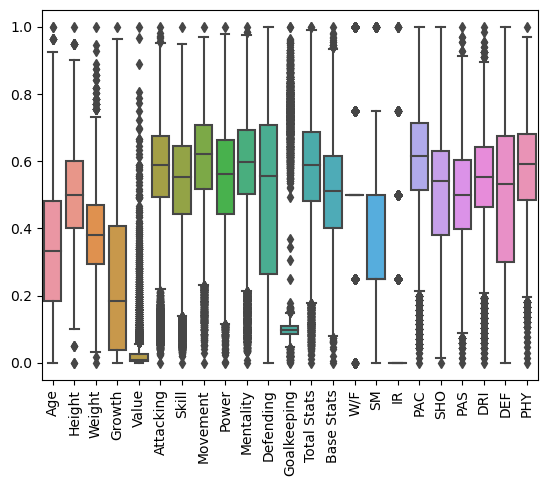

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(numerical_scaled)
plt.xticks(rotation=90)
plt.show()

# this shows how each variable is skewed relative to oneanother
# value is heavily skewed with a large tail, but we don't want to take out high value players from the model
# goalkeeping is also skewed, as most players are not goalkeepers - again we don't want to remove them
# maybe you might consider two models - one for GK, another for the rest - but not in this case

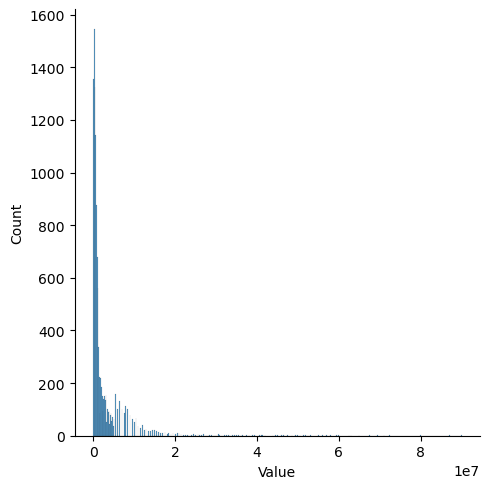

In [21]:
sns.displot(numerical['Value'])
plt.show()

In [22]:
from sklearn.preprocessing import OneHotEncoder

# Create encoder to be used on new data later.
encoder = OneHotEncoder(drop='first').fit(categorical)
cols = encoder.get_feature_names_out(input_features=categorical.columns)
categorical_encode = pd.DataFrame(encoder.transform(categorical).toarray(),columns=cols)
categorical_encode.head()

,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,foot_Right,A/W_Low,A/W_Medium,D/W_Low,D/W_Medium
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [23]:
X = pd.concat([numerical_scaled, categorical_encode], axis=1)
X

,Age,Height,Weight,Growth,Value,Attacking,Skill,Movement,Power,Mentality,...,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,foot_Right,A/W_Low,A/W_Medium,D/W_Low,D/W_Medium
0,0.370370,0.40,0.349206,0.074074,0.005833,0.556931,0.569087,0.663818,0.556270,0.654596,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.518519,0.55,0.333333,0.037037,0.094444,0.821782,0.777518,0.829060,0.768489,0.718663,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.629630,0.15,0.134921,0.037037,0.100000,0.750000,0.892272,0.886040,0.562701,0.771588,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.222222,0.45,0.277778,0.518519,0.003056,0.517327,0.505855,0.481481,0.463023,0.562674,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.259259,0.50,0.261905,0.333333,0.008056,0.534653,0.555035,0.601140,0.472669,0.665738,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,0.333333,0.60,0.404762,0.222222,0.006944,0.472772,0.480094,0.626781,0.450161,0.587744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11697,0.407407,0.60,0.452381,0.185185,0.017778,0.126238,0.124122,0.353276,0.270096,0.128134,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
11698,0.222222,0.25,0.206349,0.333333,0.012222,0.626238,0.580796,0.783476,0.466238,0.518106,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11699,0.370370,0.65,0.492063,0.296296,0.000000,0.547030,0.564403,0.242165,0.401929,0.518106,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [24]:
X.columns.values

array(['Age', 'Height', 'Weight', 'Growth', 'Value', 'Attacking', 'Skill',
       'Movement', 'Power', 'Mentality', 'Defending', 'Goalkeeping',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'IR', 'PAC', 'SHO',
       'PAS', 'DRI', 'DEF', 'PHY', 'BP_CB', 'BP_CDM', 'BP_CF', 'BP_CM',
       'BP_GK', 'BP_LB', 'BP_LM', 'BP_LW', 'BP_LWB', 'BP_RB', 'BP_RM',
       'BP_RW', 'BP_RWB', 'BP_ST', 'foot_Right', 'A/W_Low', 'A/W_Medium',
       'D/W_Low', 'D/W_Medium'], dtype=object)

In [25]:
y = data2['OVA']
y.shape

(11701,)

In [26]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

(9360, 42)
(2341, 42)
(9360,)
(2341,)


LinearRegression()

In [57]:
lm = linear_model.LinearRegression()
lm.fit(X,y)
print("b0 = " , lm.intercept_)
print("b1 = " , lm.coef_)
print('r2 is: ', lm.score(X,y))

b0 =  1706431391618.5928
b1 =  [ 1.97662686e+00  5.87532108e-01  1.01757526e+00 -3.13929134e+00
  2.31449895e+01 -2.98052666e+11 -3.15021011e+11 -2.58951698e+11
 -2.29441533e+11 -2.64853731e+11 -1.84438531e+11 -3.15021011e+11
  1.16048724e+12  4.13188453e+12  9.66335501e-02  2.51109177e+00
  1.92378599e+00 -1.10393861e+12 -1.19856192e+12 -1.07239751e+12
 -1.05662696e+12 -1.21433248e+12 -1.04085641e+12  5.16653127e+00
  9.30572386e-01  5.67976528e-01 -4.24191353e-01 -5.83129781e+00
  1.78199344e+00  1.36119204e-01  3.73275449e-01  1.18971754e+00
  1.82526729e+00 -1.12778417e-01 -2.95631708e-02  1.03608134e+00
  9.00556380e-01  8.17459335e-02  1.30619187e+00  4.32201699e-03
  5.38717732e-01 -2.66796055e-03]
r2 is:  0.8730396427472835


In [27]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.8734520480996124

In [28]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.8698603839204444

In [49]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
print('mse is: ', mse)

mse is:  6.162182504908746


In [50]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
print('rmse is: ', rmse)

rmse is:  2.4823743684039172


In [48]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions_test)
print('mae is: ', mae)

mae is:  1.8570901315877295


In [31]:
y_test.mean()

66.57624946604015

In [45]:
# from sklearn.metrics import mean_squared_error as mse

# train_mse=mse(linreg.predict(X_train), y_train)
# test_mse=mse(linreg.predict(X_test), y_test)

#print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

### Start test of model with validation data here

In [34]:
#import validation data
data_for_p = pd.read_csv('fifa21_validate.csv')
display(data_for_p.head())

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,...,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,...,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,...,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,"6'3""",170lbs,...,54+2,54+2,53+2,53+2,54+2,54+2,54+2,53+2,11+2,55
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,"6'2""",170lbs,...,72+2,72+2,70+2,69+2,68+2,68+2,68+2,69+2,18+2,70


In [35]:
def sofifa_clean_df(df):
    import math
    
    def feet_to_cm(height_str):
        feet, inches = map(int, height_str.replace('"', '').split("'"))
        total_inches = (feet * 12) + inches
        cm = total_inches * 2.54
        return cm
    
    
    def value_calc(value_str):
        value = value_str.replace("€","")
        if 'M' in value:
            value = value.replace("M","")
            value = pd.to_numeric(value, errors='coerce')
            value = value * 1000000
        elif 'K' in value:
            value = value.replace("K","")
            value = pd.to_numeric(value, errors='coerce')
            value = value * 1000
        else:
            value = pd.to_numeric(value, errors='coerce')
        return value
    
    
    df2=df[['BP','Age','Height','Weight','foot','Growth','Value','Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping','Total Stats','Base Stats', 'W/F', 'SM', 'A/W','D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF','PHY','OVA']].copy()
    df2['Height'] = df2['Height'].apply(feet_to_cm)
    df2['Weight']=df2['Weight'].str.replace("lbs","")
    df2['Weight']=pd.to_numeric(df2['Weight'], errors='coerce')
    df2['Value'] = df2['Value'].apply(value_calc)
  
    df2['W/F'] = df2['W/F'].str.replace(" ★","")
    df2['W/F']=pd.to_numeric(df2['W/F'], errors='coerce')
   
    df2['SM'] = df2['SM'].str.replace("★","")
    df2['SM']=pd.to_numeric(df2['SM'], errors='coerce')
    df2['IR'] = df2['IR'].str.replace(" ★","")
    df2['IR']=pd.to_numeric(df2['IR'], errors='coerce')
    
    #fill NAN
    df2['A/W'] = df2['A/W'].fillna('Medium')
    df2['D/W'] = df2['D/W'].fillna('Medium')
    
    return df2

In [36]:
data_for_p_cleaned = sofifa_clean_df(data_for_p)

In [37]:
def feature_target_split(df):
    y = df["OVA"]
    categorical = df.select_dtypes('object')
    numerical = df._get_numeric_data().drop(['OVA'], axis=1)
    return y, categorical, numerical

In [38]:
y_p, categorical_p, numerical_p = feature_target_split(data_for_p_cleaned)

In [39]:
numerical_p_scaled = transformer.transform(numerical_p)
numerical_p_scaled = pd.DataFrame(numerical_p_scaled, columns=numerical.columns)
numerical_p_scaled   #scaled values for the validation dataset

,Age,Height,Weight,Growth,Value,Attacking,Skill,Movement,Power,Mentality,...,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,0.259259,0.65,0.611111,0.296296,0.010833,0.487624,0.433255,0.541311,0.498392,0.532033,...,0.404580,0.25,0.25,0.00,0.542857,0.171053,0.367647,0.328358,0.701299,0.712121
1,0.222222,0.35,0.293651,0.222222,0.013333,0.655941,0.672131,0.746439,0.610932,0.643454,...,0.496183,0.75,0.50,0.00,0.685714,0.657895,0.544118,0.686567,0.155844,0.454545
2,0.111111,0.65,0.468254,0.666667,0.001333,0.037129,0.021077,0.148148,0.122186,0.058496,...,0.255725,0.25,0.00,0.00,0.428571,0.460526,0.411765,0.402985,0.181818,0.393939
3,0.000000,0.70,0.420635,0.888889,0.001778,0.450495,0.423888,0.461538,0.350482,0.487465,...,0.286260,0.50,0.25,0.00,0.457143,0.223684,0.323529,0.358209,0.532468,0.484848
4,0.296296,0.65,0.420635,0.222222,0.025556,0.648515,0.665105,0.589744,0.655949,0.721448,...,0.683206,0.75,0.25,0.00,0.585714,0.592105,0.632353,0.626866,0.740260,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.185185,0.35,0.206349,0.444444,0.003611,0.405941,0.384075,0.658120,0.360129,0.493036,...,0.332061,0.50,0.25,0.00,0.714286,0.144737,0.308824,0.402985,0.532468,0.454545
1995,0.185185,0.80,0.468254,0.370370,0.002111,0.108911,0.063232,0.225071,0.141479,0.091922,...,0.343511,0.25,0.00,0.00,0.485714,0.500000,0.470588,0.507463,0.233766,0.409091
1996,0.407407,0.30,0.230159,0.037037,0.088889,0.740099,0.772834,0.678063,0.630225,0.699164,...,0.610687,0.75,0.75,0.25,0.557143,0.684211,0.779412,0.731343,0.350649,0.500000
1997,0.666667,0.50,0.468254,0.037037,0.001556,0.581683,0.510539,0.498575,0.536977,0.674095,...,0.450382,0.50,0.25,0.00,0.385714,0.394737,0.485294,0.447761,0.636364,0.636364


In [40]:
cols = encoder.get_feature_names_out(input_features=categorical.columns)
categorical_p_encode = pd.DataFrame(encoder.transform(categorical_p).toarray(),columns=cols)
categorical_p_encode.head()

,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,foot_Right,A/W_Low,A/W_Medium,D/W_Low,D/W_Medium
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [41]:
X_p = pd.concat([numerical_p_scaled, categorical_p_encode], axis=1)
X_p

,Age,Height,Weight,Growth,Value,Attacking,Skill,Movement,Power,Mentality,...,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,foot_Right,A/W_Low,A/W_Medium,D/W_Low,D/W_Medium
0,0.259259,0.65,0.611111,0.296296,0.010833,0.487624,0.433255,0.541311,0.498392,0.532033,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.222222,0.35,0.293651,0.222222,0.013333,0.655941,0.672131,0.746439,0.610932,0.643454,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.111111,0.65,0.468254,0.666667,0.001333,0.037129,0.021077,0.148148,0.122186,0.058496,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.000000,0.70,0.420635,0.888889,0.001778,0.450495,0.423888,0.461538,0.350482,0.487465,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.296296,0.65,0.420635,0.222222,0.025556,0.648515,0.665105,0.589744,0.655949,0.721448,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.185185,0.35,0.206349,0.444444,0.003611,0.405941,0.384075,0.658120,0.360129,0.493036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1995,0.185185,0.80,0.468254,0.370370,0.002111,0.108911,0.063232,0.225071,0.141479,0.091922,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1996,0.407407,0.30,0.230159,0.037037,0.088889,0.740099,0.772834,0.678063,0.630225,0.699164,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1997,0.666667,0.50,0.468254,0.037037,0.001556,0.581683,0.510539,0.498575,0.536977,0.674095,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [42]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_p)
r2_score(y_p, predictions)

0.8656373410787813

In [43]:
from sklearn.metrics import mean_squared_error
mse_p =mean_squared_error(y_p,predictions)
mse_p

6.148634268797416

In [44]:
rmse_p = np.sqrt(mean_squared_error(y_p,predictions))
rmse_p

2.479643980251483

Conclusion: 
Our model may be considered very accurate as the r2_score, the mse and rms for the validation data are very close. 


Thank you for your support. 